# **Fine-Tuning Support Vector Machines - A Guide to Hyperparameters and Feature Scaling**`

---

### **Python Tutorial**
Follow each instruction carefully and generate the code to answer each question to properly understand the concepts taught in this tutorial

**Question 1**

How can we generate a synthetic dataset for classification tasks in Python?

In [25]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.2, random_state=42
)

**Question 2**

Split the resulting dataset into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Question 3**

Define a function to plot decision boundaries for an SVM model

In [28]:
def plot_decision_boundary(X, y, clf, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  # Reduced step size for memory efficiency
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis, marker='o')
    ax.set_title(title)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)

### **Exploring the Effect of Hyperparameters on SVM Decision Boundaries**

**Question 4**

Using the defined function above,

a) show three different plots with values of C = 0.1, 1, and 10

b) show three different plots with values of gamma = 0.1, 1, and 10

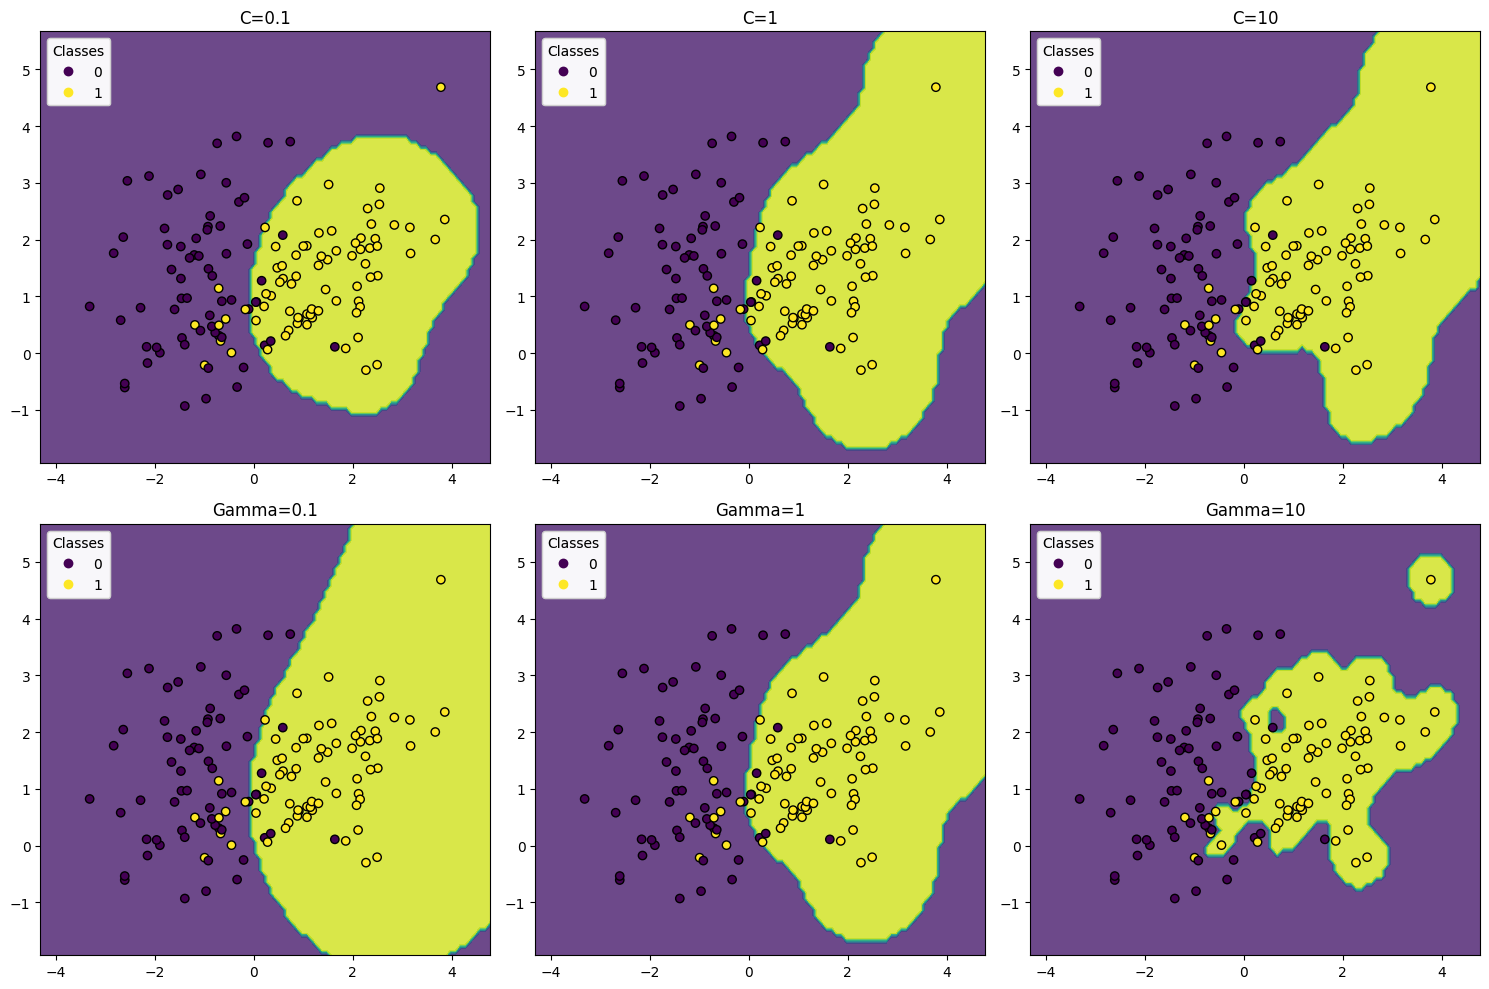

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


# a: Effect of Regularization Parameter C
for i, C in enumerate([0.1, 1, 10]):
    svc = SVC(C=C, kernel='rbf', gamma=1)
    svc.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, svc, f"C={C}", axes[0, i])

# b: Effect of Gamma
for i, gamma in enumerate([0.1, 1, 10]):
    svc = SVC(C=1, kernel='rbf', gamma=gamma)
    svc.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, svc, f"Gamma={gamma}", axes[1, i])

plt.tight_layout()
plt.show()

### **Demonstrating the Importance of Feature Scaling in SVM**

In [30]:
# Introduce unscaled data by modifying feature magnitudes
X_unscaled = X_train.copy()
X_unscaled[:, 0] *= 100  # Scale one feature disproportionately

In [ ]:
svc_no_scaling = SVC(C=1, kernel='rbf', gamma=1)
svc_with_scaling = SVC(C=1, kernel='rbf', gamma=1)

# Without scaling
svc_no_scaling.fit(X_unscaled, y_train)

# With scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)
svc_with_scaling.fit(X_scaled, y_train)

**Question 5**

Using plots, compare the decision boundaries in both scaled and non-scaled datasets above.

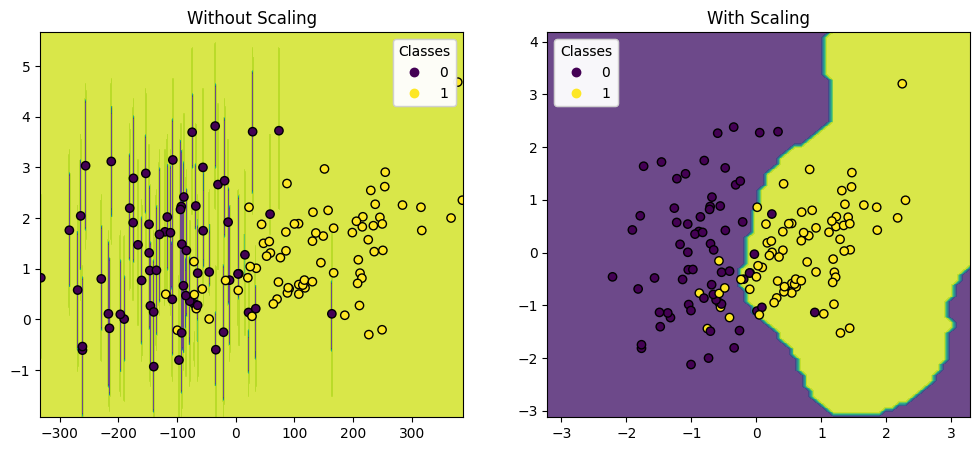

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(X_unscaled, y_train, svc_no_scaling, "Without Scaling", ax[0])
plot_decision_boundary(X_scaled, y_train, svc_with_scaling, "With Scaling", ax[1])
plt.show()
